# Photons Spectra at Physical Dump

Determination of the energy spectrum of the primary photons hitting the LUXE-NPOD physical dump and energy spectrum of secondary photons produced inside the dump.

They are responsible for the production of ALPs in the dump material.

The energy spectra are used to weight the MadGraph signal samples for ALP production at LUXE-NPOD.

The samples are located at DESY:
`/nfs/dust/luxe/group/MCProduction/Signal/g4/ptarmigan-v0.11/elaser/phase1/npod/`

In [1]:
!ls /nfs/dust/luxe/group/MCProduction/Signal/g4/ptarmigan-v0.11/elaser/phase1/npod/*root

/nfs/dust/luxe/group/MCProduction/Signal/g4/ptarmigan-v0.11/elaser/phase1/npod/luxe_npod_signal_e1npod_0_5_165gev_cv9qgsphp_tv33_hv1_0_8636.root
/nfs/dust/luxe/group/MCProduction/Signal/g4/ptarmigan-v0.11/elaser/phase1/npod/luxe_npod_signal_e1npod_0_5_165gev_cv9qgsphp_tv33_hv1_0_8637.root
/nfs/dust/luxe/group/MCProduction/Signal/g4/ptarmigan-v0.11/elaser/phase1/npod/luxe_npod_signal_e1npod_0_5_165gev_cv9qgsphp_tv33_hv1_0_8638.root
/nfs/dust/luxe/group/MCProduction/Signal/g4/ptarmigan-v0.11/elaser/phase1/npod/luxe_npod_signal_e1npod_0_5_165gev_cv9qgsphp_tv33_hv1_0_8639.root
/nfs/dust/luxe/group/MCProduction/Signal/g4/ptarmigan-v0.11/elaser/phase1/npod/luxe_npod_signal_e1npod_0_5_165gev_cv9qgsphp_tv33_hv1_0_8640.root
/nfs/dust/luxe/group/MCProduction/Signal/g4/ptarmigan-v0.11/elaser/phase1/npod/luxe_npod_signal_e1npod_0_5_165gev_cv9qgsphp_tv33_hv1_0_8641.root
/nfs/dust/luxe/group/MCProduction/Signal/g4/ptarmigan-v0.11/elaser/phase1/npod/luxe_npod_signal_e1npod_0_5_165gev_cv9qgsphp_tv33_h

In [2]:
# In case we want to use ROOT
import ROOT

Welcome to JupyROOT 6.24/06


In [3]:
# In case we want to use python stuff
import numpy as np
import pandas as pd
import uproot

The list of input files we want to read is stored in `npod_files_root.py` if we want to use ROOT.

In [4]:
from npod_files_root import npod_files_list_root

### Primary Photons Energy Spectrum

In [8]:
# Read the files loading them into a TChain
ch = ROOT.TChain("Tracks","Tracks")

for file in npod_files_list_root:
    ch.Add(file)

In [9]:
# Draw primary photons energy spectrum

# First of all, check if a canvas already exists.
# In that case, delete it
try:
    del c1
except NameError:
    pass

try:
    del h_primary
except NameError:
    pass

# Then, create a canvas to draw the histogram
c1 = ROOT.TCanvas("c1", "c1")

# Prepare the plot for the primary photons energy (0.05 GeV bins)
h_primary = ROOT.TH1F("h_primary","h_primary", 500, 0, 25)

Now we have to understand how to normalize the spectrum. We want to normalize to the number of photons per incoming electron.

We know that we produce 1.5e9 electrons per bunch crossing.

Since we processed only part of the NPOD sample, we are simulating only a fraction of the photons that would be produced in a bunch crossing.

In an e-mail exchange with Sasha, we got total number of photons produced in a BX: `349712990` (about 350M) in the specific file we are processing: `e1npod_10x120_0000_particles.h5`.

The actual number of primary photons present in each rootfile is obtained by looking at the number of particles with `detid==-1`.

In [10]:
# Get total number of primary photons in the files available now
h_photons = ROOT.TH1F("h_photons","h_photons", 500, 0, 25)
ch.Draw("E>>h_photons", "detid==-1", "hist")


1540000

In [11]:
# Put the number into a variable
n_primary_photons = h_photons.Integral()
print(n_primary_photons)

n_total_primary_photons = 349712990 # from Sasha
weight_string = "weight*(detid==48000 && pdg==22 && trackid==1)/({}*1.5e9)".format(n_primary_photons/n_total_primary_photons)
print(weight_string)


1540000.0
weight*(detid==48000 && pdg==22 && trackid==1)/(0.004403611086908725*1.5e9)


In [12]:
# Fill histogram
ch.Draw("E>>h_primary", weight_string, "hist")

1453243

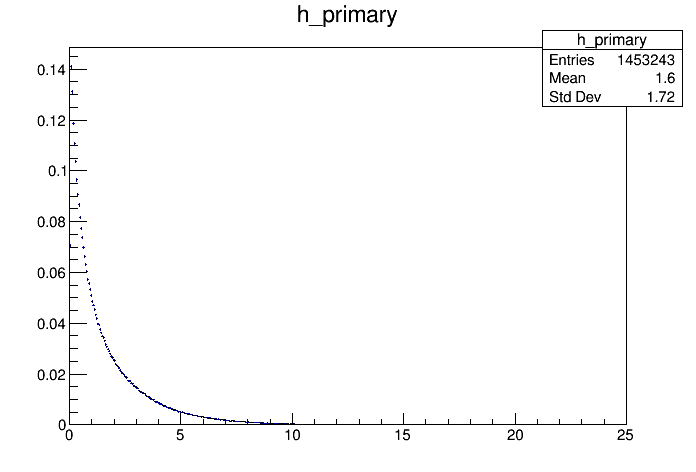

In [13]:
# Plot the histogram
h_primary.Draw()
c1.Modified()
c1.Update()
c1.Draw()

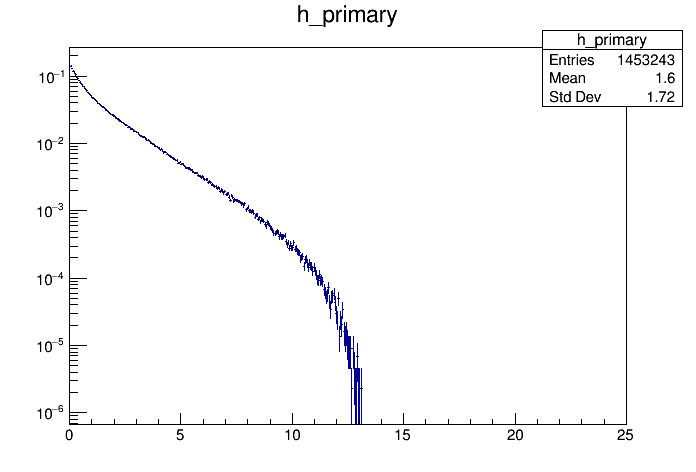

In [14]:
# Plot the histogram
c1.SetLogy()
h_primary.Draw()
c1.Modified()
c1.Update()
c1.Draw()

In [15]:
# Save the histogram into a file
out_file = ROOT.TFile("Photons_spectra.root","recreate")
out_file.cd()
h_primary.Write()
out_file.Close()

### Secondary Photons Energy Spectrum

To estimate the secondary photons energy spectrum, we can use the `Trajectory` TTree.

It contains

In [16]:
# Read the files loading them into a TChain
ch_secondaries = ROOT.TChain("Trajectory","Trajectory")

for file in npod_files_list_root:
    ch_secondaries.Add(file)

In [17]:
# Draw primary photons energy spectrum

# First of all, check if a canvas already exists.
# In that case, delete it
try:
    del c2
except NameError:
    pass

try:
    del h_secondary
except NameError:
    pass

# Then, create a canvas to draw the histogram
c2 = ROOT.TCanvas("c2", "c2")

# Finally, plot the primary photons energy on a histogram (0.05 GeV bins)
h_secondary = ROOT.TH1F("h_secondary","h_secondary", 500, 0, 25)

We use the same normalization as for the primary photons.

In [18]:
n_total_primary_photons = 349712990 # from Sasha
weight_string_secondaries = "weight*(pdg==22 && trackid>1)/({}*1.5e9)".format(n_primary_photons/n_total_primary_photons)
print(weight_string_secondaries)

weight*(pdg==22 && trackid>1)/(0.004403611086908725*1.5e9)


In [19]:
# Fill the histogram
ch_secondaries.Draw("E[0]>>h_secondary", weight_string_secondaries, "hist")

1258065933

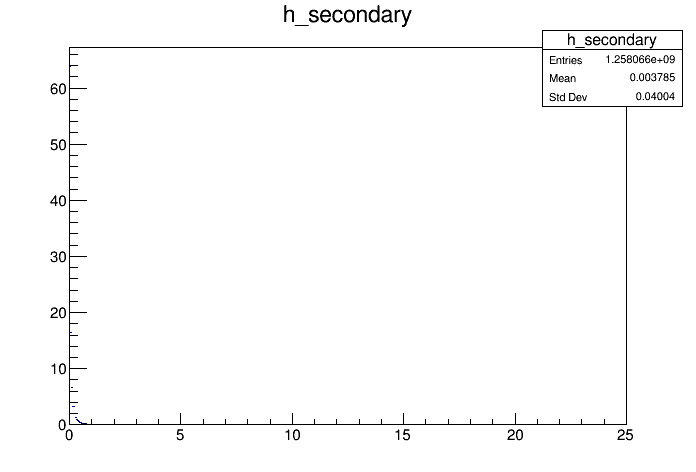

In [20]:
# Plot the histogram
h_secondary.Draw()
c2.Modified()
c2.Update()
c2.Draw()

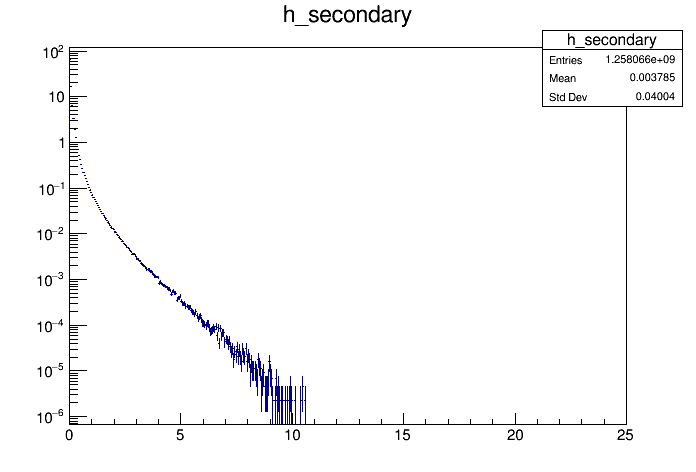

In [22]:
# Plot the histogram in log scale
c2.SetLogy()
h_secondary.Draw()
c2.Modified()
c2.Update()
c2.Draw()

In [23]:
# # Save the histogram into a file
# out_file_secondary = ROOT.TFile("Secondary_Photons_spectra.root","recreate")
# out_file_secondary.cd()
# h_secondary.Write()
# out_file_secondary.Close()

In [27]:
# Draw the total photons energy spectrum

# First of all, check if a canvas already exists.
# In that case, delete it
try:
    del c3
except NameError:
    pass

try:
    del h_all
except NameError:
    pass


In [29]:
# Histogram with the sum of primary and secondary photons
h_all = h_primary.Clone()
h_all.SetName("h_all")
h_all.SetTitle("h_all")
h_all.Add(h_secondary)

True

In [30]:
# Then, create a canvas and draw the histogram
c3 = ROOT.TCanvas("c3", "c3")

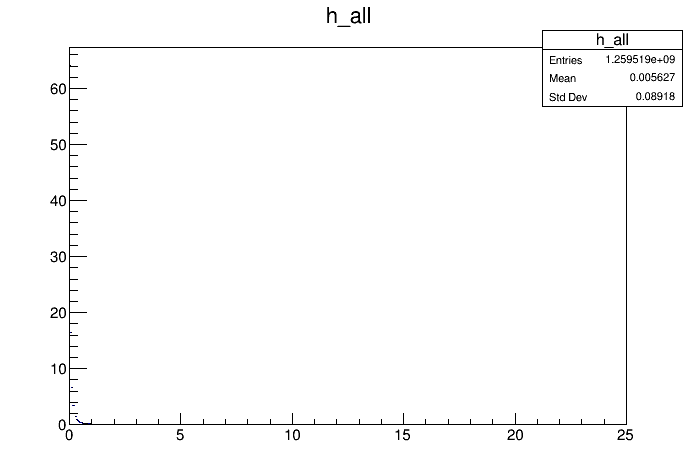

In [31]:
# Plot the histogram
h_all.Draw()
c3.Modified()
c3.Update()
c3.Draw()

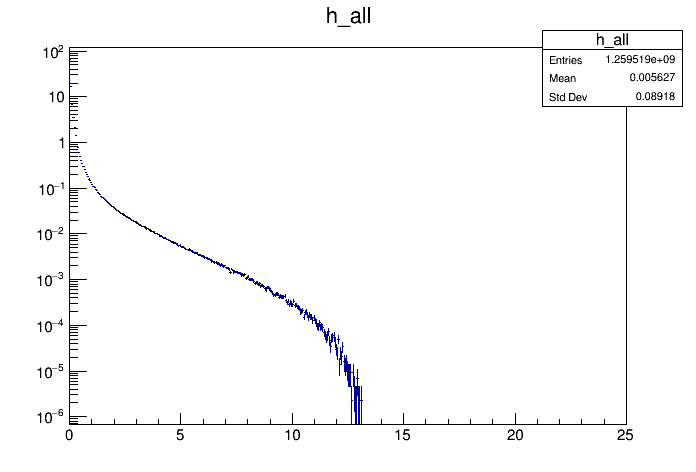

In [32]:
# Plot the histogram in log scale
c3.SetLogy()
h_all.Draw()
c3.Modified()
c3.Update()
c3.Draw()

In [33]:
# Save the histograms into a file
out_file_all = ROOT.TFile("Photons_spectra_all.root","recreate")
out_file_all.cd()
h_primary.Write()
h_secondary.Write()
h_all.Write()
out_file_all.Close()